    a. Problem Statetement

    b. Data Cleaning And Preprocessing

    c. Exploratory Data Analysis

    d. Modeling

    e. Conclusion

    f. Daftar Pustaka

Submisi Jupyter Notebook berisi kode dalam bahasa python serta 
interpretasi dan penjelasan hasil penemuan insight data dalam bentuk 
markdown.

### A. Problem Statement

### B. Data Cleaning And Preprocessing

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')

### Dibagi per Sheet

#### Sheet Data Jakarta

In [4]:
df_daily_update = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name='Data Jakarta')
df_daily_update.shape

(838, 14)

In [5]:
# check dataframe for missing values
df_daily_update.isnull().sum()

Tanggal              0
Jam                838
Tanggal Jam        838
Meninggal            0
Sembuh               0
Self Isolation       0
Masih Perawatan      0
Total Pasien         0
Positif Harian       0
Positif Aktif        0
Sembuh Harian        0
Tanpa Gejala       140
Bergejala          140
Belum Ada Data     140
dtype: int64

pada variabel jam dan tanggal jam memiliki keseluruhan data null sehingga dilakukan *dropping*, kemudian pada variabel tanpa gejala, bergejala, dan belum ada data tidak dilakukan *dropping* karena kami asumsikan akan menghilangkan informasi penting sehingga kami lakukan imputasi dengan mengisinya dengan nilai 0

In [27]:
df_daily_update.drop(['Jam','Tanggal Jam'],axis=1,inplace=True)
df_daily_update.fillna(0,inplace=True)

In [28]:
# check dataframe for information about data types
df_daily_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Tanggal          838 non-null    datetime64[ns]
 1   Meninggal        838 non-null    int64         
 2   Sembuh           838 non-null    int64         
 3   Self Isolation   838 non-null    int64         
 4   Masih Perawatan  838 non-null    int64         
 5   Total Pasien     838 non-null    int64         
 6   Positif Harian   838 non-null    int64         
 7   Positif Aktif    838 non-null    int64         
 8   Sembuh Harian    838 non-null    int64         
 9   Tanpa Gejala     838 non-null    float64       
 10  Bergejala        838 non-null    float64       
 11  Belum Ada Data   838 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 78.7 KB


Karena Tanggal sudah bertipe datetime sehingga tidak perlu dilakukan preprocessing

In [29]:
df_daily_update

,Tanggal,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
0,2020-03-01,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1,2020-03-02,0,0,0,0,0,0,0,0,0.0,0.0,0.0
2,2020-03-03,1,0,0,2,3,3,2,0,0.0,0.0,0.0
3,2020-03-04,1,0,0,2,3,0,2,0,0.0,0.0,0.0
4,2020-03-05,3,0,0,4,7,4,4,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
833,2022-06-12,15303,1236002,2000,214,1253519,322,2214,164,0.0,9.0,2205.0
834,2022-06-13,15304,1236184,2179,200,1253867,348,2379,182,0.0,14.0,2365.0
835,2022-06-14,15304,1236374,2446,260,1254384,517,2706,190,0.0,14.0,2692.0
836,2022-06-15,15304,1236528,2980,302,1255114,730,3282,154,0.0,15.0,3267.0


In [8]:
fig = px.line(x='Tanggal', y=['Total Pasien','Meninggal','Sembuh'], data_frame=df_daily_update,title='Total Pasien Covid, Pasien Meninggal, dan Pasien Sembuh pada april 2020 hinga 2022')
fig.add_annotation(x='2021-07-01', y=700000,
            text="Terjadi kenaikan covid",
            align="center",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            # yshift=40,
            # xshift=10,
            ax=-50,
            ay=-30,
            bordercolor="#333",
            borderwidth=2,
            borderpad=4,
            bgcolor="#F15412",
            opacity=0.8,
            font_color="#fff")

fig.add_annotation(x='2022-02-01', y=1100000,
            text="Terjadi kenaikan covid",
            align="center",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            # yshift=40,
            # xshift=10,
            ax=-50,
            ay=-30,
            bordercolor="#333",
            borderwidth=2,
            borderpad=4,
            bgcolor="#F15412",
            opacity=0.8,
            font_color="#fff")
fig.show()

In [22]:
df_daily_update[['Bergejala','Tanpa Gejala','Positif Harian']]

,Bergejala,Tanpa Gejala,Positif Harian
0,NaN,NaN,0
1,NaN,NaN,0
2,NaN,NaN,3
3,NaN,NaN,0
4,NaN,NaN,4
...,...,...,...
833,9.0,0.0,322
834,14.0,0.0,348
835,14.0,0.0,517
836,15.0,0.0,730


In [26]:
df_daily_update[df_daily_update.Bergejala > df_daily_update['Positif Harian']]

,Tanggal,Jam,Tanggal Jam,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
140,2020-07-19,NaN,NaN,748,10444,4236,923,16351,313,5159,327,8503.0,5362.0,2486.0
141,2020-07-20,NaN,NaN,749,10602,4335,1026,16712,361,5361,158,8356.0,5760.0,2596.0
142,2020-07-21,NaN,NaN,758,10864,4458,1073,17153,441,5531,262,8577.0,5832.0,2744.0
143,2020-07-22,NaN,NaN,766,11187,4383,1193,17529,376,5576,323,8767.0,5962.0,2800.0
144,2020-07-23,NaN,NaN,767,11302,4675,1201,17945,416,5876,115,8770.0,6283.0,2892.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,2021-12-16,NaN,NaN,13583,850685,108,113,864489,40,221,36,26.0,70.0,125.0
656,2021-12-17,NaN,NaN,13583,850719,118,107,864527,38,225,34,28.0,66.0,131.0
662,2021-12-23,NaN,NaN,13584,850910,157,145,864796,16,302,52,50.0,32.0,220.0
665,2021-12-26,NaN,NaN,13584,851008,176,224,864992,47,400,24,28.0,63.0,309.0


In [74]:
df_daily_update[['Total Pasien','Meninggal','Sembuh']].max()

Total Pasien    1255810
Meninggal         15305
Sembuh          1236820
dtype: int64

In [72]:
print('Persentase Pasien Sembuh : %f '% ((1236820/1255810)*100))
print('Persentase Pasien Meninggal : %f '% ((15305/1255810)*100))

Persentase Pasien Sembuh : 98.487829 
Persentase Pasien Meninggal : 1.218735 


In [90]:
fig = px.pie(names=['Sembuh','Meninggal'],values=[1236820,15305],title='Persentasi total',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textinfo='percent+value')
fig.show()

98,8 persen pasien covid jakarta sembuh dan 1,2 persen meninggal

<AxesSubplot:xlabel='Tanggal', ylabel='Positif Harian'>

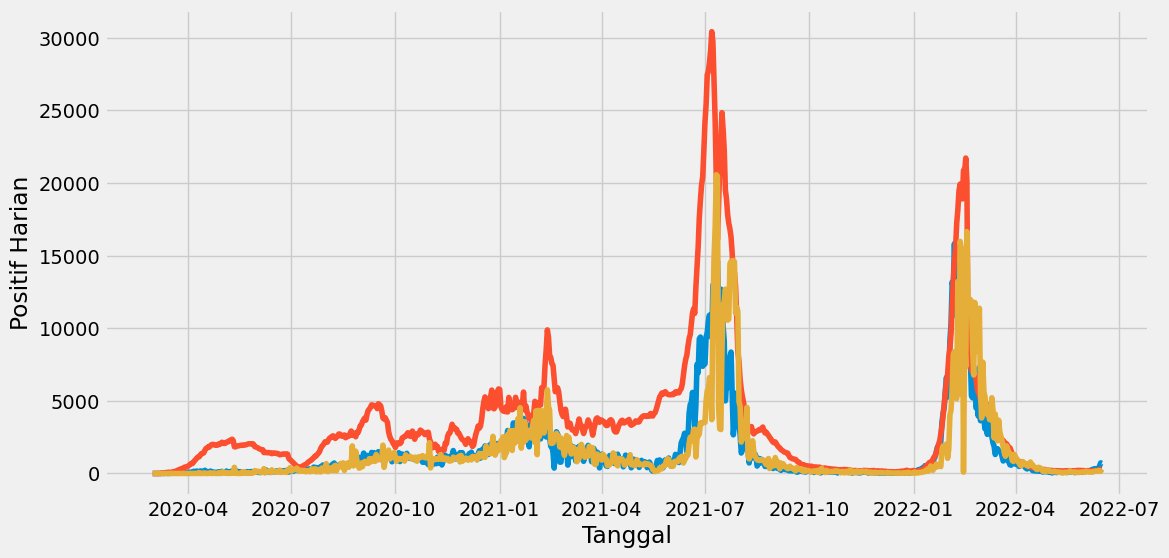

In [7]:
plt.figure(figsize=(12, 6), dpi=100)
sns.lineplot(x='Tanggal', y='Positif Harian', data=df_daily_update)
sns.lineplot(x='Tanggal', y='Masih Perawatan', data=df_daily_update)
sns.lineplot(x='Tanggal', y='Sembuh Harian', data=df_daily_update)

Jumlah harian pasien yang terkena covid, meninggal, dan sembuh

#### RDT Ab

Kyknya ini sama aja kyk di DATA COVID JAKARTA jadi gaperlu digunain

In [30]:
df_daily_update = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name='RDT Ab')
df_daily_update.shape

(812, 8)

In [31]:
# check dataframe for missing values
df_daily_update.isnull().sum()

No.                  0
Tanggal              0
Reaktif              0
Non-Reaktif          0
Total                0
Positivity Rate      0
Unnamed: 6         812
catatan:           811
dtype: int64

In [32]:
# check dataframe for information about data types
df_daily_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   No.              812 non-null    int64         
 1   Tanggal          812 non-null    datetime64[ns]
 2   Reaktif          812 non-null    int64         
 3   Non-Reaktif      812 non-null    int64         
 4   Total            812 non-null    int64         
 5   Positivity Rate  812 non-null    float64       
 6   Unnamed: 6       0 non-null      float64       
 7   catatan:         1 non-null      object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 50.9+ KB


In [33]:
# list of columns that have missing values more than 50%
missing_col_list = [col for col in df_daily_update.columns if df_daily_update[col].isnull().sum() / df_daily_update.shape[0] > 0.5]
missing_col_list

['Unnamed: 6', 'catatan:']

In [34]:
# make a new dataframe
df_daily_update = df_daily_update.drop(missing_col_list, axis=1)

In [35]:
df_daily_update

,No.,Tanggal,Reaktif,Non-Reaktif,Total,Positivity Rate
0,1,2020-03-27,124,10839,10963,0.011311
1,2,2020-03-28,149,11858,12007,0.012409
2,3,2020-03-29,206,14808,15014,0.013721
3,4,2020-03-30,290,17619,17909,0.016193
4,5,2020-03-31,307,18242,18549,0.016551
...,...,...,...,...,...,...
807,808,2022-06-12,41821,692114,733935,0.056982
808,809,2022-06-13,41821,692114,733935,0.056982
809,810,2022-06-14,41821,692114,733935,0.056982
810,811,2022-06-15,41821,692114,733935,0.056982


<AxesSubplot:xlabel='Tanggal', ylabel='Total'>

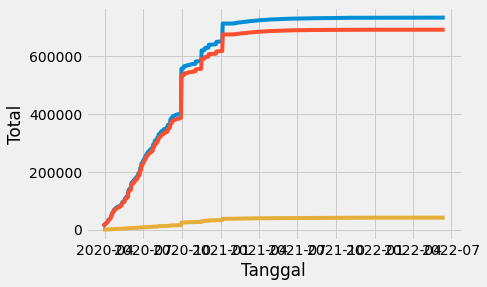

In [14]:
sns.lineplot(x='Tanggal', y='Total', data=df_daily_update)
sns.lineplot(x='Tanggal', y='Non-Reaktif', data=df_daily_update)
sns.lineplot(x='Tanggal', y='Reaktif', data=df_daily_update)

total

<AxesSubplot:xlabel='Tanggal', ylabel='Positivity Rate'>

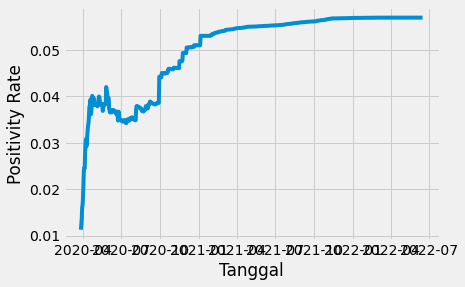

In [36]:
sns.lineplot(x='Tanggal', y='Positivity Rate', data=df_daily_update)

total 

RDT Ag

In [16]:
df_daily_update = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name='RDT Ag',skiprows=1)
df_daily_update.shape

(532, 22)

In [17]:
# check dataframe for missing values
df_daily_update.isnull().sum()

Unnamed: 0                    0
Tgl                           0
Positif                       0
Negatif                       0
Total                         0
Positivity Rate               0
Positif.1                     0
Negatif.1                     0
Total.1                       0
Positivity Rate.1            57
Positif.2                     0
Negatif.2                     0
Total.2                       0
Positivity Rate.2            56
Tes Harian                    0
Positif  Harian               0
Negatif Harian                0
Positivity Rate Harian        9
Total Kumulatif               0
Positif Kumulatif             0
Negatif Kumulatif             0
Positivity Rate Kumulatif     0
dtype: int64

In [18]:
# check dataframe for information about data types
df_daily_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 532 non-null    int64         
 1   Tgl                        532 non-null    datetime64[ns]
 2   Positif                    532 non-null    int64         
 3   Negatif                    532 non-null    int64         
 4   Total                      532 non-null    int64         
 5   Positivity Rate            532 non-null    float64       
 6   Positif.1                  532 non-null    int64         
 7   Negatif.1                  532 non-null    int64         
 8   Total.1                    532 non-null    int64         
 9   Positivity Rate.1          475 non-null    float64       
 10  Positif.2                  532 non-null    int64         
 11  Negatif.2                  532 non-null    int64         
 12  Total.2 

In [19]:
df_daily_update

,Unnamed: 0,Tgl,Positif,Negatif,Total,Positivity Rate,Positif.1,Negatif.1,Total.1,Positivity Rate.1,...,Total.2,Positivity Rate.2,Tes Harian,Positif Harian,Negatif Harian,Positivity Rate Harian,Total Kumulatif,Positif Kumulatif,Negatif Kumulatif,Positivity Rate Kumulatif
0,1,2021-01-01,76,1116,1192,0.063758,0,0,0,NaN,...,0,NaN,1192,76,1116,0.063758,1192,76,1116,0.063758
1,2,2021-01-02,76,1116,1192,0.063758,0,0,0,NaN,...,0,NaN,0,0,0,NaN,1192,76,1116,0.063758
2,3,2021-01-03,100,1699,1799,0.055586,0,0,0,NaN,...,0,NaN,607,24,583,0.039539,1799,100,1699,0.055586
3,4,2021-01-04,100,1699,1799,0.055586,0,0,0,NaN,...,0,NaN,0,0,0,NaN,1799,100,1699,0.055586
4,5,2021-01-05,100,1699,1799,0.055586,0,0,0,NaN,...,0,NaN,0,0,0,NaN,1799,100,1699,0.055586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,528,2022-06-12,9469,156218,165687,0.057150,275983,10152622,10428605,0.026464,...,1016,0.041339,6207,107,6100,0.017239,10595308,285494,10309814,0.026945
528,529,2022-06-13,9469,156222,165691,0.057149,276139,10159893,10436032,0.026460,...,1016,0.041339,7431,156,7275,0.020993,10602739,285650,10317089,0.026941
529,530,2022-06-14,9471,156404,165875,0.057097,276389,10173789,10450178,0.026448,...,1016,0.041339,14330,252,14078,0.017585,10617069,285902,10331167,0.026929
530,531,2022-06-15,9473,156473,165946,0.057085,276615,10184319,10460934,0.026443,...,1016,0.041339,10827,228,10599,0.021058,10627896,286130,10341766,0.026923


In [20]:
df_daily_update = df_daily_update[['Tgl','Total Kumulatif','Positif Kumulatif','Negatif Kumulatif','Positivity Rate Kumulatif']]
df_daily_update

,Tgl,Total Kumulatif,Positif Kumulatif,Negatif Kumulatif,Positivity Rate Kumulatif
0,2021-01-01,1192,76,1116,0.063758
1,2021-01-02,1192,76,1116,0.063758
2,2021-01-03,1799,100,1699,0.055586
3,2021-01-04,1799,100,1699,0.055586
4,2021-01-05,1799,100,1699,0.055586
...,...,...,...,...,...
527,2022-06-12,10595308,285494,10309814,0.026945
528,2022-06-13,10602739,285650,10317089,0.026941
529,2022-06-14,10617069,285902,10331167,0.026929
530,2022-06-15,10627896,286130,10341766,0.026923


<AxesSubplot:xlabel='Tgl', ylabel='Total Kumulatif'>

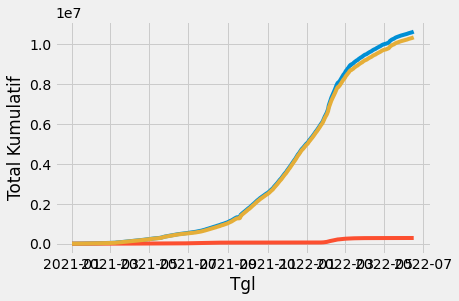

In [21]:
sns.lineplot(x='Tgl', y='Total Kumulatif', data=df_daily_update)
sns.lineplot(x='Tgl', y='Positif Kumulatif', data=df_daily_update)
sns.lineplot(x='Tgl', y='Negatif Kumulatif', data=df_daily_update)

<AxesSubplot:xlabel='Tgl', ylabel='Positivity Rate Kumulatif'>

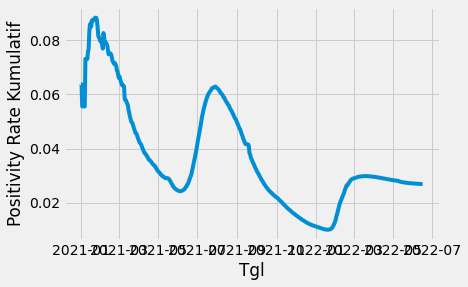

In [22]:
sns.lineplot(x='Tgl', y='Positivity Rate Kumulatif', data=df_daily_update)

#### Hasil Lab
ini kyknya juga gadibutuhin

In [37]:
#vaksinasi wilaya
df_daily_update = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name='Hasil Lab')
df_daily_update

,Tanggal,Jumlah Orang di Test,Orang Positif Harian,Orang Negatif Harian,Positivity Rate Kasus Baru Harian,Total Spesimen di Test,Positif,Negatif,Positivity Rate Spesimen Harian
0,2020-02-29,40,0,40,0.000000,40,0,40,"0,0%"
1,2020-03-01,39,0,39,0.000000,39,0,39,"0,0%"
2,2020-03-02,3,0,3,0.000000,3,0,3,"0,0%"
3,2020-03-03,15,3,12,0.200000,15,3,12,"20,0%"
4,2020-03-04,7,0,7,0.000000,7,0,7,"0,0%"
...,...,...,...,...,...,...,...,...,...
832,2022-06-11,6389,322,6067,0.050399,6945,445,6500,0.0641
833,2022-06-12,5541,348,5193,0.062805,5960,460,5500,0.0772
834,2022-06-13,8034,517,7517,0.064352,8632,646,7986,0.0748
835,2022-06-14,9518,730,8788,0.076697,10122,908,9214,0.09


<AxesSubplot:xlabel='Tanggal', ylabel='Orang Positif Harian'>

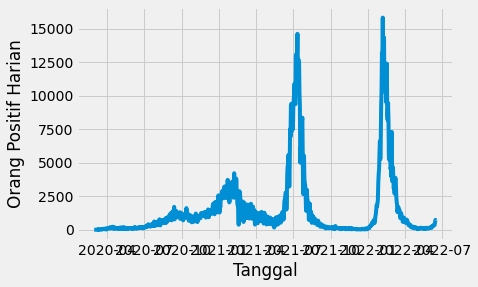

In [38]:
sns.lineplot(x='Tanggal', y='Orang Positif Harian', data=df_daily_update)

<AxesSubplot:xlabel='Tanggal', ylabel='Orang Negatif Harian'>

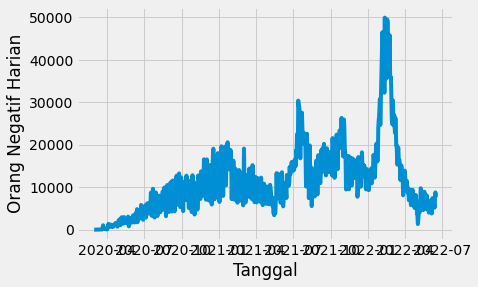

In [39]:
sns.lineplot(x='Tanggal', y='Orang Negatif Harian', data=df_daily_update)

<AxesSubplot:xlabel='Tanggal', ylabel='Positivity Rate Kasus Baru Harian'>

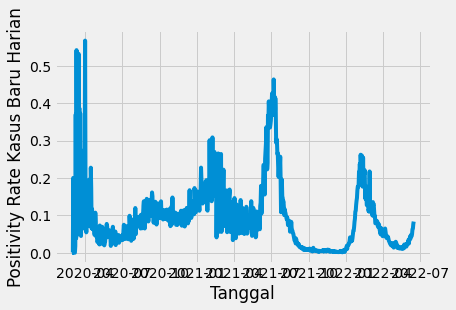

In [40]:
sns.lineplot(x='Tanggal', y='Positivity Rate Kasus Baru Harian', data=df_daily_update)

#### Daily Vaksinasi Wilayah

In [27]:
#vaksinasi wilaya
df_daily_update = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name='Daily Vaksinasi Wilayah').iloc[:,:3].dropna(axis=0, how='any')
df_daily_update

,Tanggal,Cakupan Suntik 1,Cakupan Suntik 2
0,2021-06-12,19281.0,1173.0
1,2021-06-13,198.0,29.0
2,2021-06-14,79491.0,3691.0
3,2021-06-15,81545.0,3385.0
4,2021-06-16,92210.0,3436.0
...,...,...,...
364,2022-06-11,430.0,280.0
365,2022-06-12,300.0,194.0
366,2022-06-13,900.0,1272.0
367,2022-06-14,1028.0,1112.0


<AxesSubplot:xlabel='Tanggal', ylabel='Cakupan Suntik 1'>

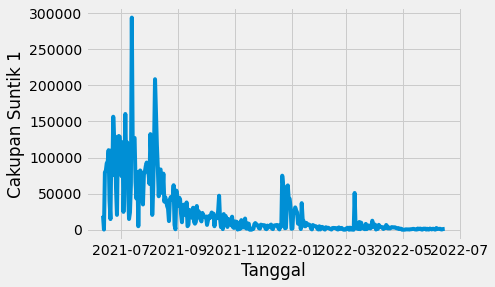

In [28]:
sns.lineplot(x='Tanggal', y='Cakupan Suntik 1', data=df_daily_update)

<AxesSubplot:xlabel='Tanggal', ylabel='Cakupan Suntik 2'>

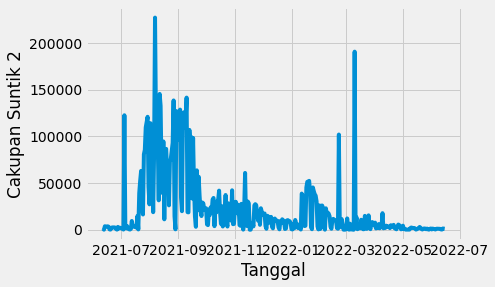

In [29]:
sns.lineplot(x='Tanggal', y='Cakupan Suntik 2', data=df_daily_update)

#### Vaksinasi Wilayah


In [30]:
#vaksinasi wilaya
df_daily_update = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name='Vaksinasi Wilayah',skiprows=1)
df_daily_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Columns: 1118 entries, No. to Cakupan Suntik 2.370
dtypes: float64(4), int64(742), object(372)
memory usage: 384.4+ KB


In [31]:
df_daily_update = df_daily_update.drop(df_daily_update.select_dtypes('float64'),axis=1)

In [32]:
df_daily_update = df_daily_update.groupby(["No.","Kecamatan","Kota / Kabupaten","Target Total per Kecamatan","Target Harian per Kecamatan"]).sum().sum(axis=1).to_frame().rename(columns={0:'Total Vaksinasi'}).reset_index().drop(['No.','Target Total per Kecamatan','Target Harian per Kecamatan'],axis=1)
df_daily_update

,Kecamatan,Kota / Kabupaten,Total Vaksinasi
0,Cakung,Jakarta Timur,555303
1,Cengkareng,Jakarta Barat,694473
2,Kali Deres,Jakarta Barat,587065
3,Cilincing,Jakarta Utara,483607
4,Duren Sawit,Jakarta Timur,470542
5,Tanjung Priok,Jakarta Utara,782796
6,Jagakarsa,Jakarta Selatan,406610
7,Kebon Jeruk,Jakarta Barat,485189
8,Koja,Jakarta Utara,608483
9,Kebayoran Lama,Jakarta Selatan,461942


In [33]:
df_daily_update2 = df_daily_update.copy()
df_daily_update2 = df_daily_update2.reset_index().drop(['Kecamatan','index'], axis=1).groupby(['Kota / Kabupaten']).sum()
df_daily_update2

,Total Vaksinasi
Kota / Kabupaten,
Jakarta Barat,3889204
Jakarta Pusat,3905840
Jakarta Selatan,5564185
Jakarta Timur,4721845
Jakarta Utara,3348347
Kepulauan Seribu,45919


<AxesSubplot:xlabel='Kota / Kabupaten', ylabel='Total Vaksinasi'>

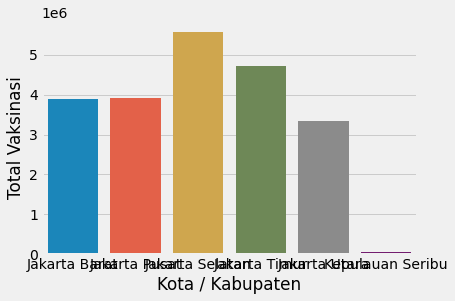

In [34]:
sns.barplot(x='Kota / Kabupaten',y='Total Vaksinasi', data=df_daily_update2.reset_index())

#### Vaksinasi Booster Wilayah

In [35]:
df_daily_update = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name='Vaksinasi Booster Wilayah')
df_daily_update

,Tanggal,Kecamatan,Wilayah,Akumulasi Cakupan D3,Persentase D3 terhadap D2 (Masyarakat Rentan/Umum),Persentase D3 terhadap D2
0,2022-02-06,Cakung,Jakarta Timur,12745,0.0672,0.0460
1,2022-02-06,Cengkareng,Jakarta Barat,16789,0.0601,0.0513
2,2022-02-06,Kali Deres,Jakarta Barat,12736,0.0516,0.0442
3,2022-02-06,Cilincing,Jakarta Utara,5756,0.0272,0.0243
4,2022-02-06,Duren Sawit,Jakarta Timur,20377,0.1087,0.0853
...,...,...,...,...,...,...
5715,2022-06-15,Taman Sari,Jakarta Barat,61254,0.5997,0.5287
5716,2022-06-15,Tambora,Jakarta Barat,57592,0.3853,0.3315
5717,2022-06-15,Tanah Abang,Jakarta Pusat,71266,0.2584,0.2035
5718,2022-06-15,Tanjung Priok,Jakarta Utara,130737,0.3808,0.3286


In [36]:
df_daily_update2 = df_daily_update.groupby(['Tanggal','Wilayah'])['Akumulasi Cakupan D3'].sum().reset_index()
df_daily_update2

,Tanggal,Wilayah,Akumulasi Cakupan D3
0,2022-02-06,Jakarta Barat,124888
1,2022-02-06,Jakarta Pusat,184916
2,2022-02-06,Jakarta Selatan,227642
3,2022-02-06,Jakarta Timur,184524
4,2022-02-06,Jakarta Utara,91900
...,...,...,...
775,2022-06-15,Jakarta Pusat,689767
776,2022-06-15,Jakarta Selatan,976313
777,2022-06-15,Jakarta Timur,944297
778,2022-06-15,Jakarta Utara,579402


In [37]:
df_daily_update2.Wilayah.unique()

array(['Jakarta Barat', 'Jakarta Pusat', 'Jakarta Selatan',
       'Jakarta Timur', 'Jakarta Utara', 'Kepulauan Seribu'], dtype=object)

<AxesSubplot:xlabel='Tanggal', ylabel='Akumulasi Cakupan D3'>

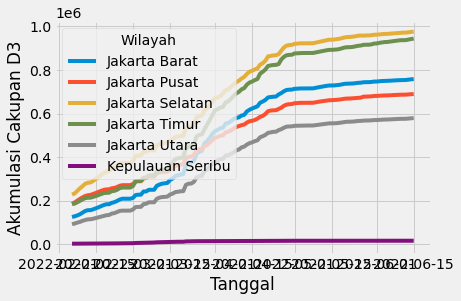

In [38]:
sns.lineplot(x='Tanggal', y='Akumulasi Cakupan D3', data=df_daily_update2,hue='Wilayah')